In [1]:
import os

# Задание

Скачайте материалы к занятию. Проанализируйте ряды и сделайте их стационарными. Пришлите решение в виде ссылки на GitHub с ноутбуком.

В данной работе мы будем анализировать следующие временные ряды:

In [2]:
files = os.listdir('Series')
print(*files, sep='\n')

daily-total-female-births-in-cal.csv
international-airline-passengers.csv
mean-monthly-air-temperature-deg.csv
monthly-boston-armed-robberies-j.csv
monthly-sales-of-company-x-jan-6.csv
weekly-closings-of-the-dowjones-.csv


## 0. Загрузка данных

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [4]:
ts = dict()
for i, file in enumerate(files):
    ts[f'series_{i+1}'] = pd.read_csv(f'Series/{file}')

In [5]:
all_series = {
    "Monthly sales of company X": ts['series_5']["Count"],
    "Monthly Boston armed robberies": ts['series_4']["Count"],
    "International airline passengers: monthly totals in thousands": ts['series_2']["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": ts['series_3']["Deg"],
    "Weekly closings of the Dow-Jones industrial average": ts['series_6']["Close"],
    "Daily total female births in California": ts['series_1']["Count"]
}

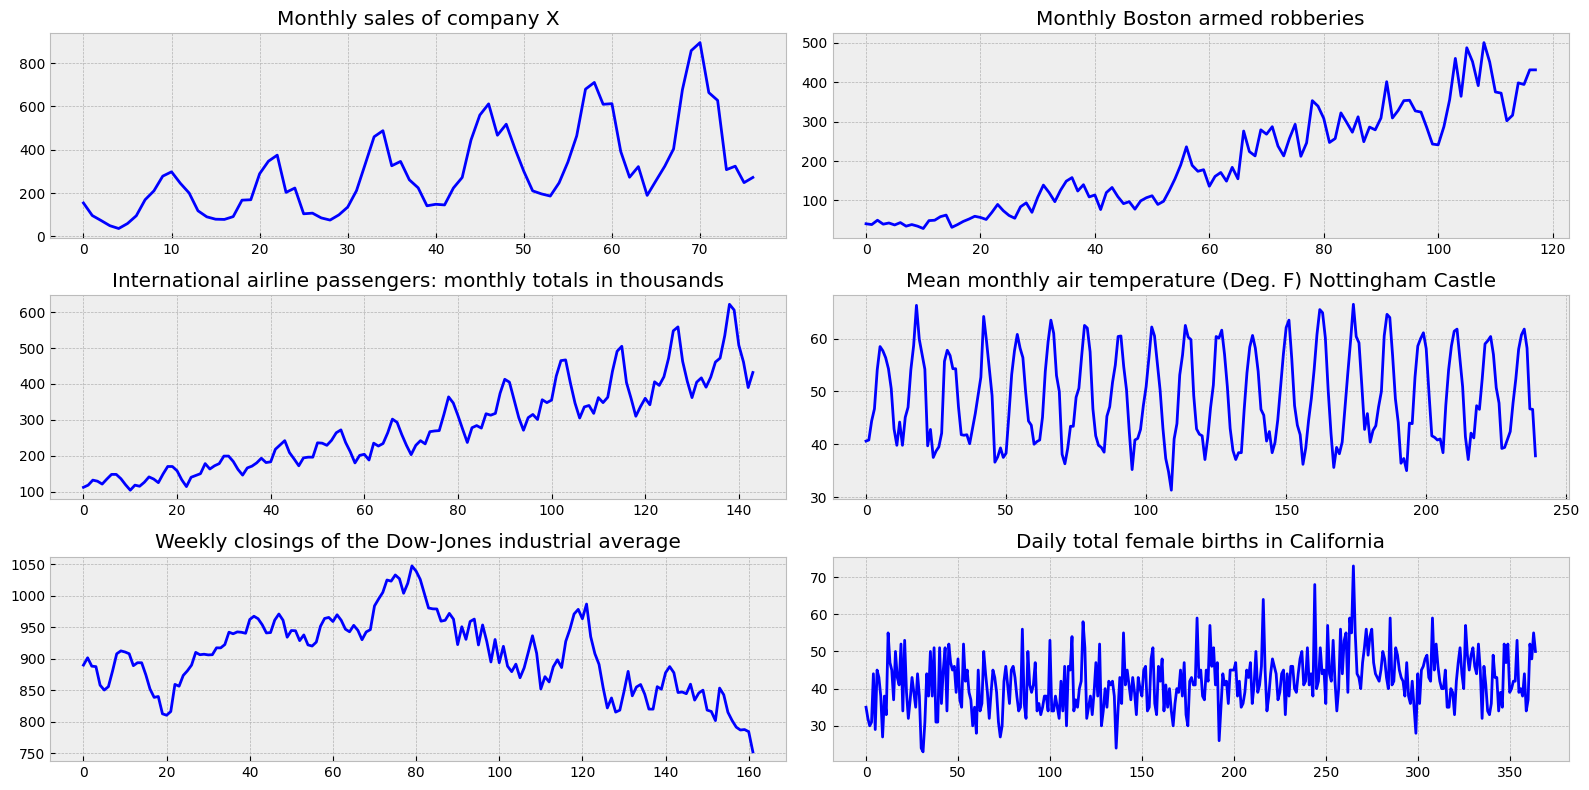

In [6]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()


In [7]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

## 1.Проанализируем ряд Monthly sales of company X

Данный временной ряд является нестационарным, т.к. для данного него характерна выраженная сезонность, тренд и рост дисперсии. Определим сезонность при помощи автокорреляции.

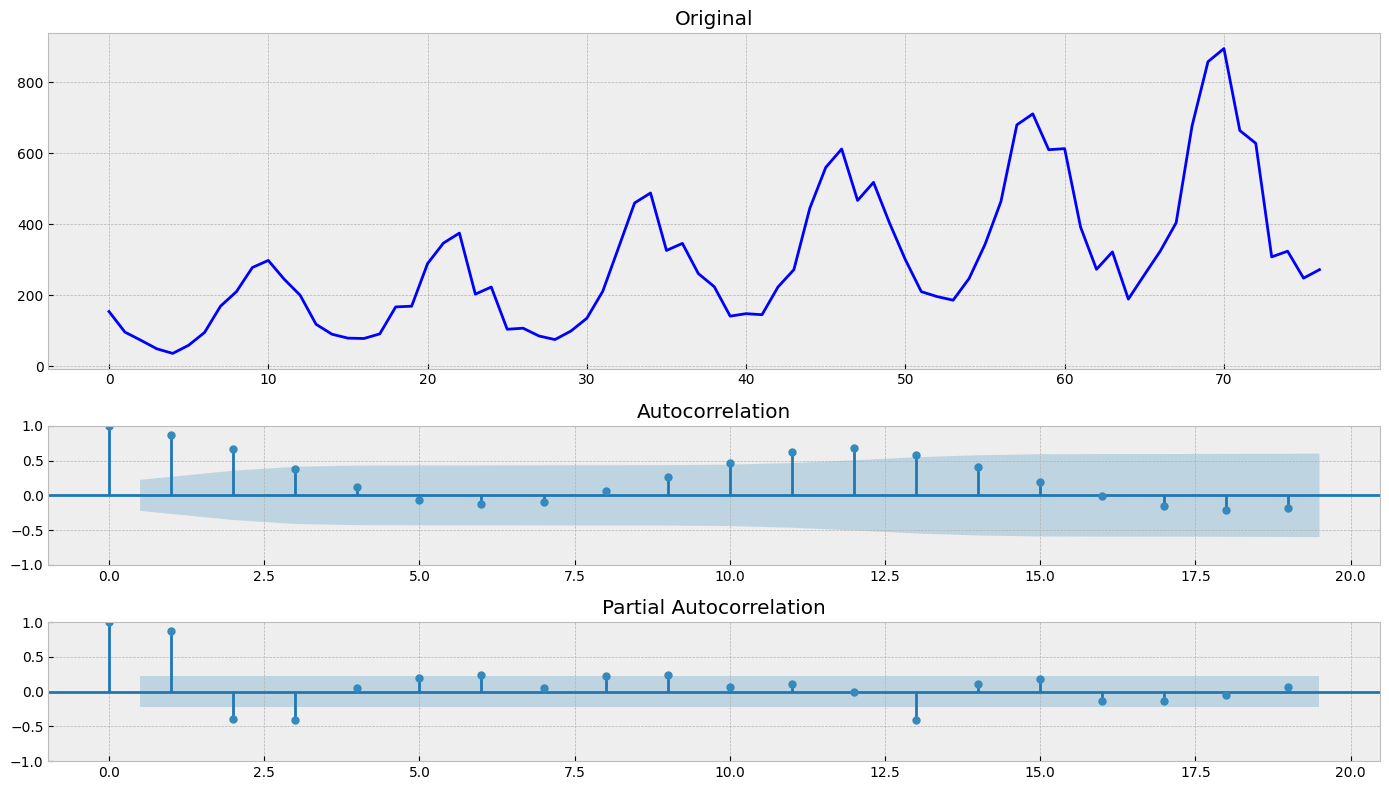

In [8]:
tsplot(all_series["Monthly sales of company X"])

Для ряда Monthly sales of company X сезонность равна 12. Продифференцируем ряд.

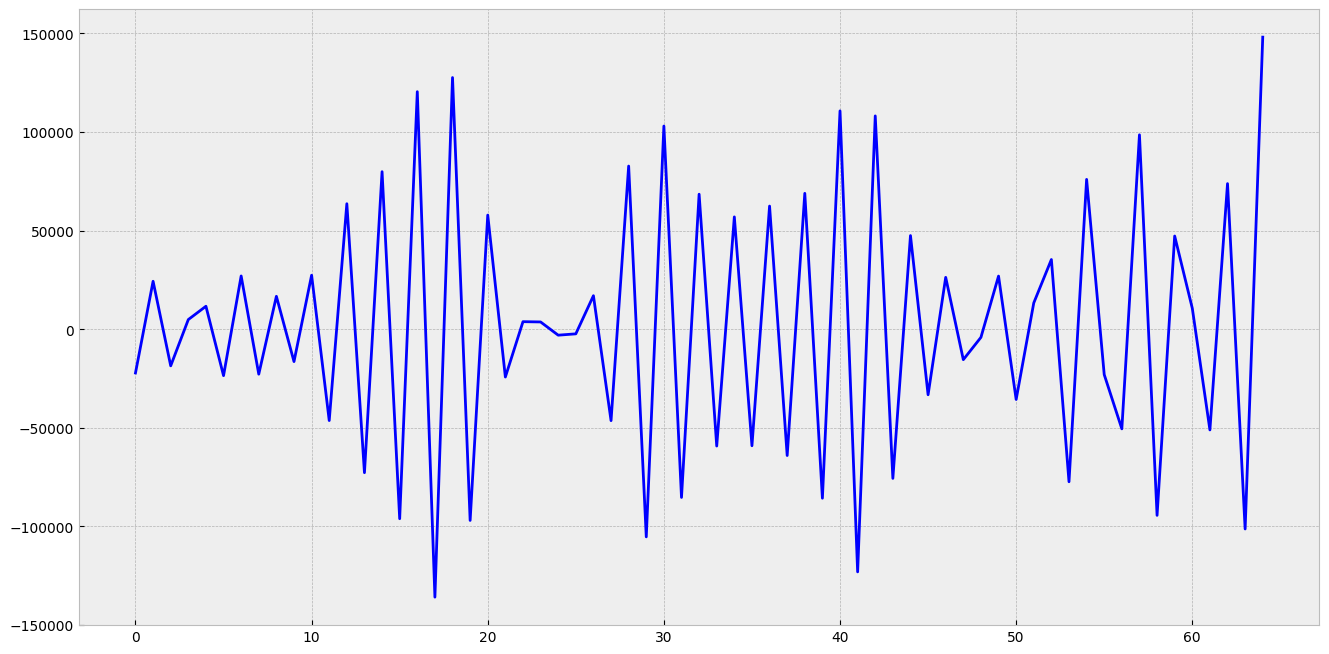

In [10]:
series = np.diff(all_series["Monthly sales of company X"], 12)
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

In [11]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [12]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                -6.590870e+00
p-value                        7.120187e-09
#Lags Used                     1.100000e+01
Number of Observations Used    5.300000e+01
Critical Value (1%)           -3.560242e+00
Critical Value (5%)           -2.917850e+00
Critical Value (10%)          -2.596796e+00
dtype: float64


Мы не можем отвергнуть гипотезу о стационарности временного ряда.

## 2.Проанализируем ряд Monthly Boston armed robberies

Данный временной ряд является нестационарным, т.к. имеет выраженный тренд. Продифференцируем ряд.

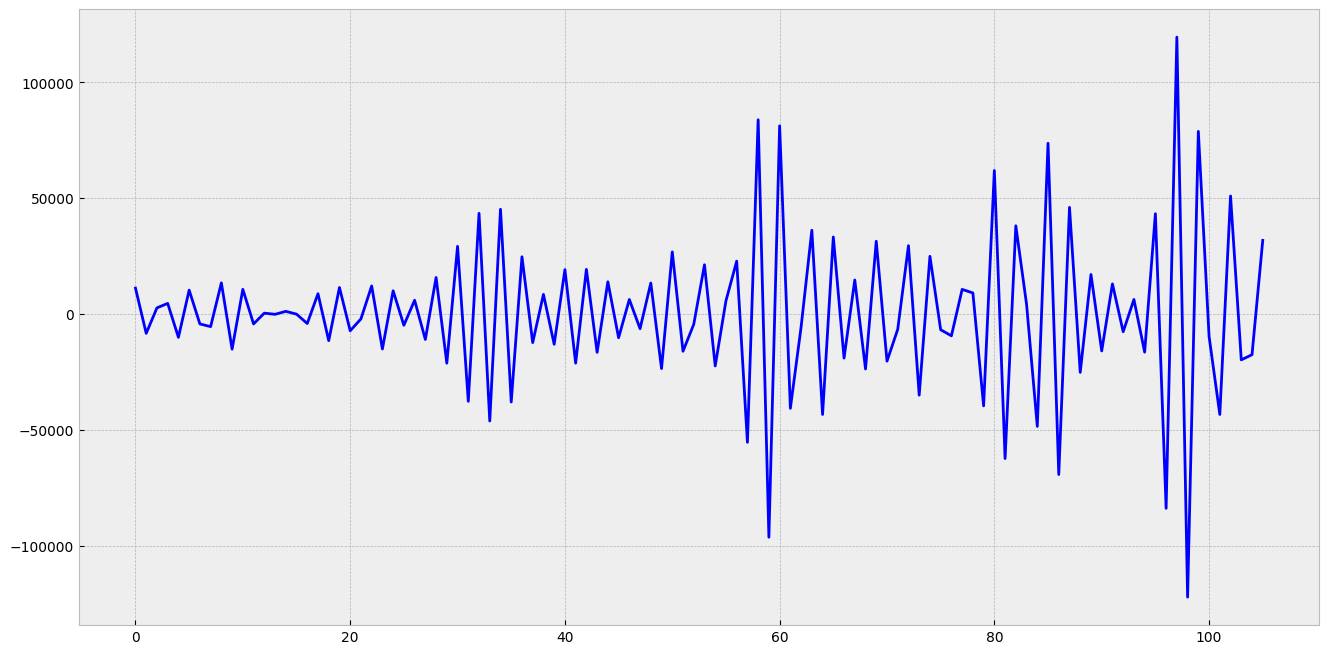

In [13]:
series = np.diff(all_series["Monthly Boston armed robberies"], 12)
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

In [16]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                -9.999936e+00
p-value                        1.896024e-17
#Lags Used                     1.300000e+01
Number of Observations Used    9.200000e+01
Critical Value (1%)           -3.503515e+00
Critical Value (5%)           -2.893508e+00
Critical Value (10%)          -2.583824e+00
dtype: float64


Мы не можем отвергнуть гипотезу о стационарности временного ряда.

## 3.Проанализируем ряд International airline passengers: monthly totals in thousands

Для данного временного ряда характерен выраженный тренд, сезонность и растущая дисперсия.

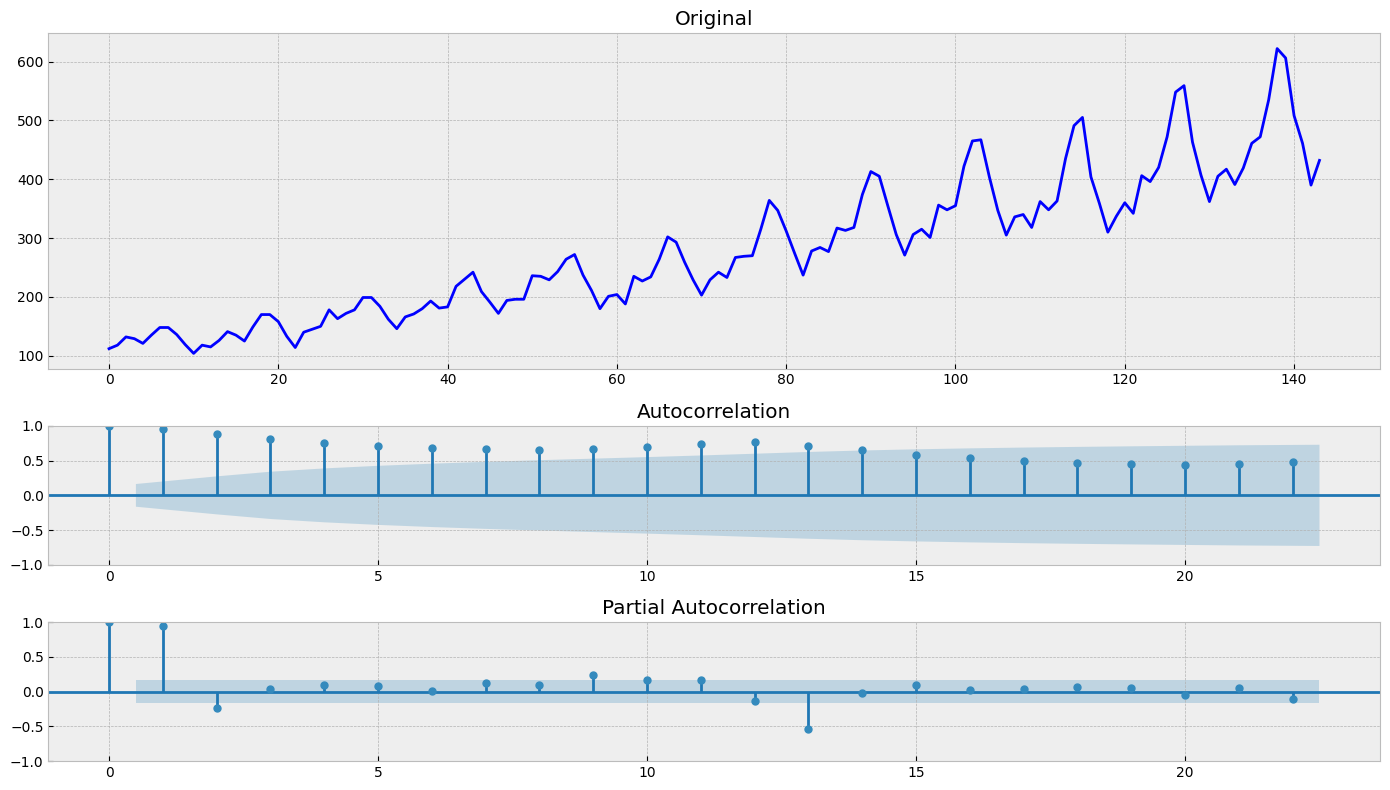

In [19]:
tsplot(all_series["International airline passengers: monthly totals in thousands"])

Для данного ряда характерна сезонность, равная 12.

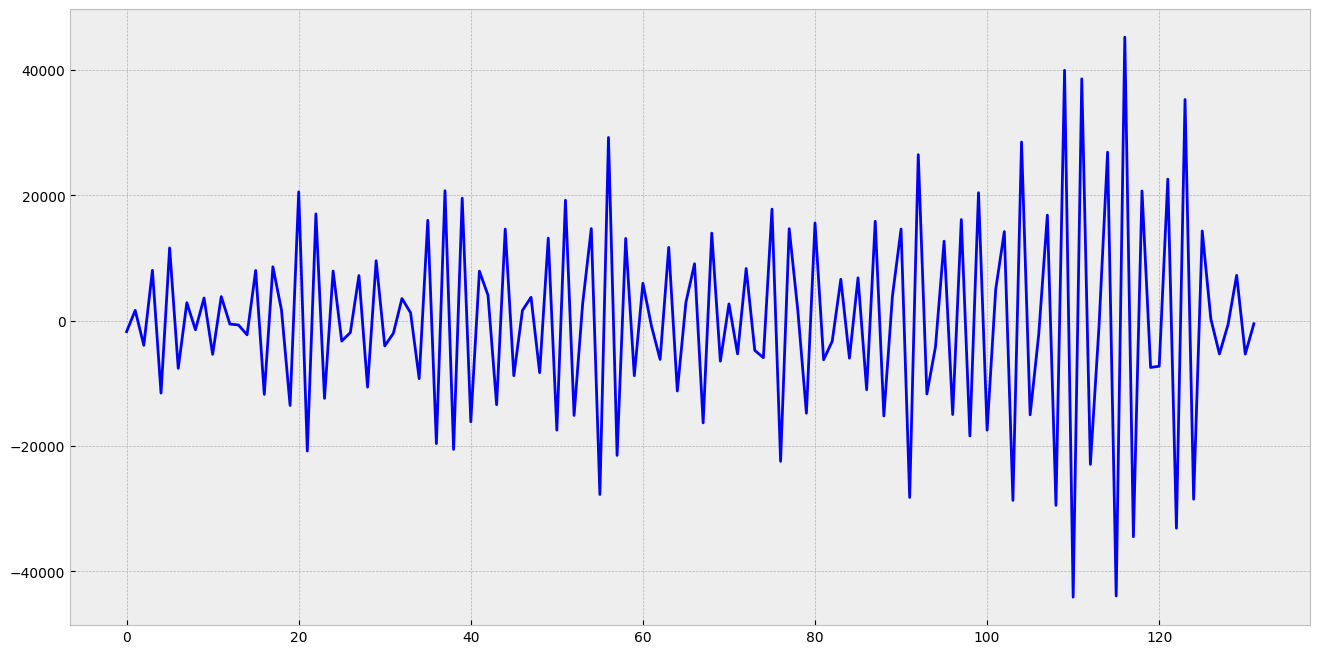

In [21]:
series = np.diff(all_series["International airline passengers: monthly totals in thousands"], 12)
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

In [22]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                -1.634342e+01
p-value                        2.980504e-29
#Lags Used                     1.300000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64


Мы не можем отвергнуть гипотезу о стационарности временного ряда.

## 4.Проанализируем ряд Mean monthly air temperature (Deg. F) Nottingham Castle

Данный временной ряд является нестационарным, т.к. имеет сезонность.

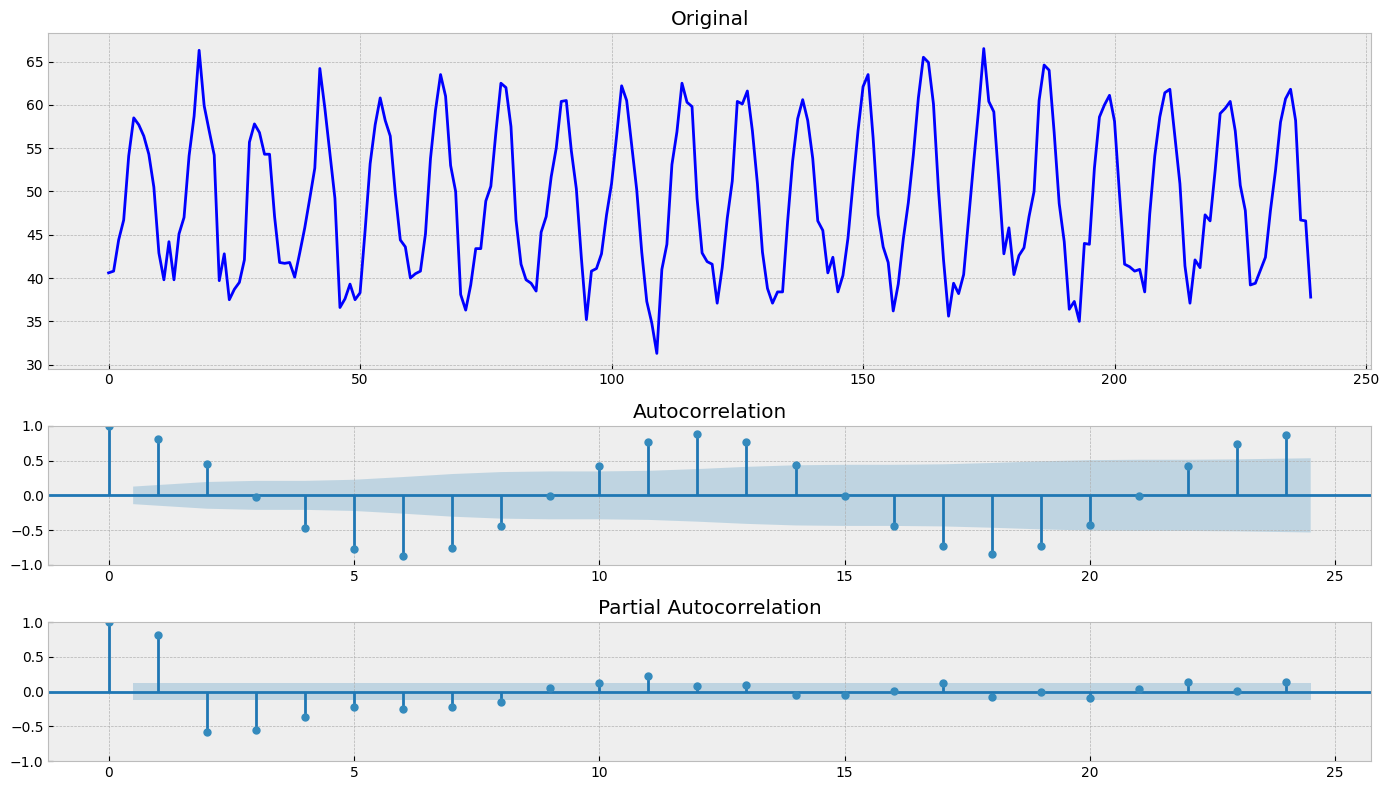

In [24]:
tsplot(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"])

Сезонность равна 12. Продифференцируем временной ряд.

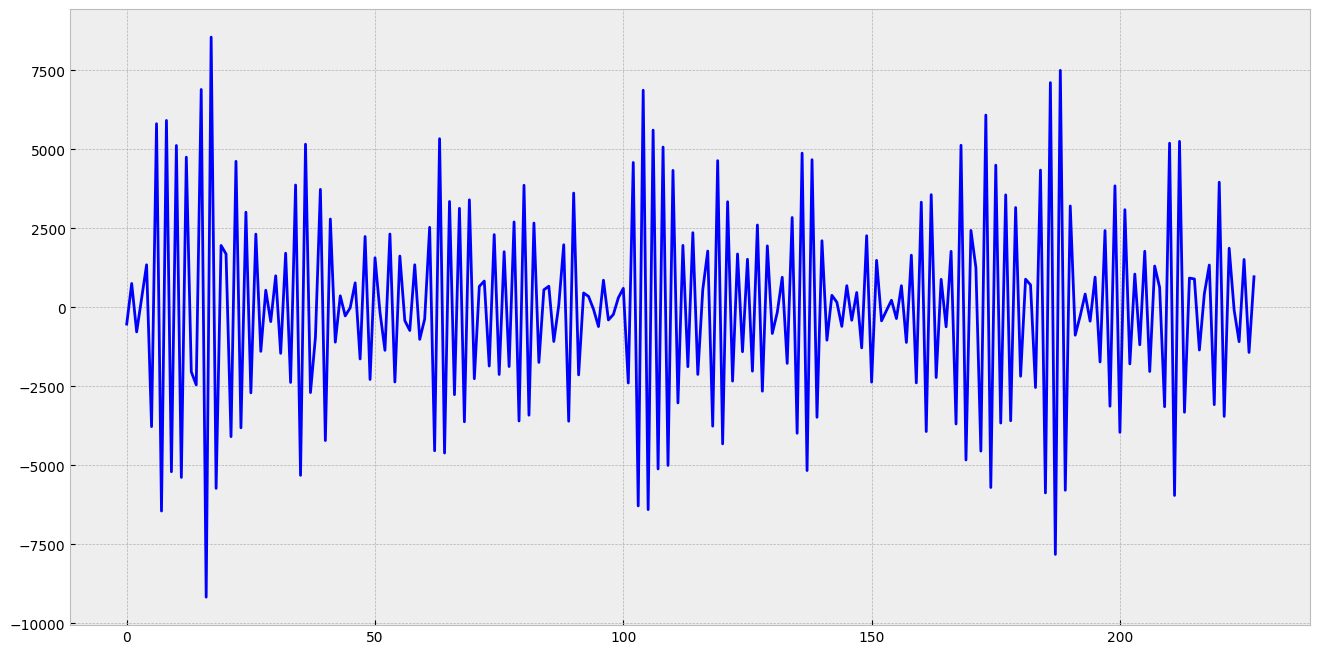

In [25]:
series = np.diff(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"], 12)
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

In [26]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                -1.672894e+01
p-value                        1.388342e-29
#Lags Used                     1.500000e+01
Number of Observations Used    2.120000e+02
Critical Value (1%)           -3.461578e+00
Critical Value (5%)           -2.875272e+00
Critical Value (10%)          -2.574089e+00
dtype: float64


Мы не можем отвергнуть гипотезу о стационарности временного ряда.

## 5.Проанализируем ряд Weekly closings of the Dow-Jones industrial average

Данный ряд является нестационарным, т.к. имеет различное матожидание для своих участков. Продифференцируем его.

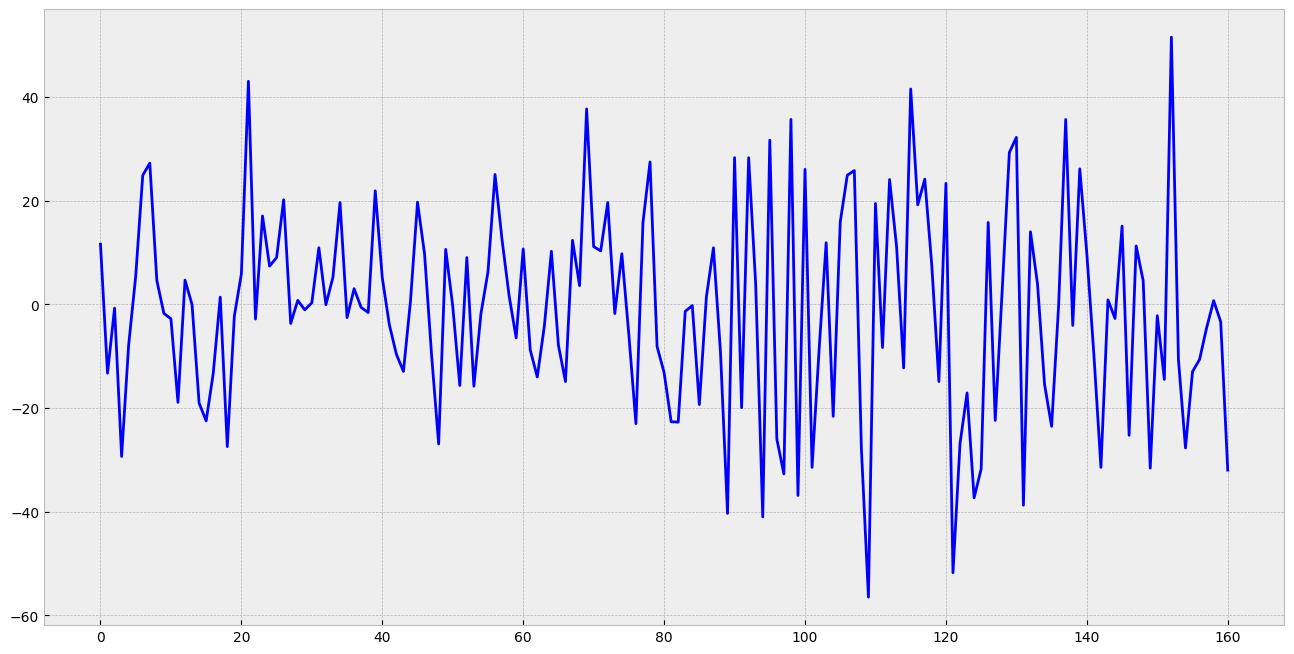

In [28]:
series = np.diff(all_series["Weekly closings of the Dow-Jones industrial average"], 1)
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

In [29]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


Мы не можем отвергнуть гипотезу о стационарности временного ряда.

## 6.Проанализируем ряд Daily total female births in California

Данный ряд уже выглядит, как стационарный. Проверим это при помощи теста.

In [30]:
test_stationarity(all_series["Daily total female births in California"])

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


Мы не можем отвергнуть гипотезу о стационарности временного ряда.